## 1. Adjacency Matrix

Adjacency Matrix keeps a value(1/0) for every pair of nodes, whether the edge exists or not. 
<br> The reason why we say it adjacency matrix, becasue it stores data in the format of matrix.
<br> Adjacency Matrix can be expressed in the format shown below:
<br> Considering |V| = n, |E| = m
    <br> A[i, j]
    <br> 1 if (i, j) ∈ E
    <br> 0 if (i, j) ∉ E
<br>1. Get(i, j) - $\theta(1)$, query whether there is an edge from edge from i to j, it takes $\theta(1)$
<br>2. Add(i, j, w) - $\theta(1)$, add edge 
<br>3. AllFrom(i) - this takes $\theta(n^2)$ 
<br> The reasons are as as following:
<br> If we want to check there is an edge from i to j, simply check if A[i, j] is 1 or 0, it is  $\theta(1)$
<br> If we want to add edge from i to j, then add new index in this matrix, it is $\theta(1)$
<br> If we want to store a list of the edge with source i, we need to traverse all matrix, this is $\theta(n^2)$  

In [19]:
# add a new vertex in the graph
def add_vertex(v):
  global graph
  global num_vertex
  global vertices
  if v in vertices:
    print("Found Vertex ", v)
  else:
    num_vertex = num_vertex + 1
    vertices.append(v)
    if num_vertex > 1:
        for vertex in graph:
            vertex.append(0)
    nv = []
    for i in range(num_vertex):
        nv.append(0)
    graph.append(nv)

# v1(from) v2(to) e(weight)
def add_edge(v1, v2, e):
    global graph
    global num_vertex
    global vertices
    # check v1 in the graph or not
    if v1 not in vertices:
        print("cannot find Vertex ", v1)
    # check v2 in the graph or not
    elif v2 not in vertices:
        print("cannot find vertex", v2)
    else:
        index1 = vertices.index(v1)
        index2 = vertices.index(v2)
        graph[index1][index2] = e

# Print the graph
def print_graph():
  global graph
  global vertices_no
  for i in range(vertices_no):
    for j in range(vertices_no):
      if graph[i][j] != 0:
        print(vertices[i], " -> ", vertices[j], \
        " edge weight: ", graph[i][j])

 
vertices = []
 
num_vertex= 0
graph = []
add_vertex("a")
add_vertex("b")
add_vertex("c")
add_vertex("d")
add_vertex("e")
## add vertex from, to, weight
add_edge("a", "b", 1)
add_edge("a", "c", 1)
add_edge("b", "c", 3)
add_edge("c", "d", 4)
add_edge("d", "a", 5)
print_graph()
print("This graph: ", graph)

a  ->  b  edge weight:  1
a  ->  c  edge weight:  1
b  ->  c  edge weight:  3
c  ->  d  edge weight:  4
d  ->  a  edge weight:  5
This graph:  [[0, 1, 1, 0, 0], [0, 0, 3, 0, 0], [0, 0, 0, 4, 0], [5, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


 ##  2. Adjacency list

Adjacency list only contains existing edges, this means its length is at most the number of edges (considering the number <br> of nodes in case there are fewer edges then nodes)

<br> We can consider adjacency list as array with V element
<br> One entry for each vertex, each component in the array contains the list of neighibors for the index vertex
<br> Considering |V| = n, |E| = m
<br>1. Get(i, j) - $\theta(1)$ 
<br>2. Add(i, j, w) - $\theta(1)$, append the list 
<br>3. AllFrom(i) - it needs $\theta(n+m)$, need to traverse linkedlist of the vertex
<br> We can consider to check whether the edge between i and j exist or not, we need to go to vertex i
<br> then check if j is linked to i or not, this will be some constant, saying $\theta(1)$
<br> If we want to add an edge from i, j, we can simply append the list, this should be $\theta(1)$
<br> If we want to know all j from source i. We can consider there are two steps.
<br> First, we need to deal with element in single vertex. Second, we need to deal with all vertices
<br> For single vertex, the run time is $\theta(1+deg(v1))$, this is up to how many edges exist in this vertex
<br> For all vertices, sum the run time up, this is $\theta(|V| + deg(v1) + deg(v2) .... )= \theta(|V| + |E|) = \theta(n+m)$

In [62]:
# add vertex and check if vertex in the list or not
def add_vertex(v):
  global graph
  global num_vertex
  if v in graph:
    print("Found Vertex ", v)
  else:
    num_vertex= num_vertex + 1
    graph[v] = []

# add vertex v1(from) v2(to) e(weight)
def add_edge(v1, v2, e):
  global graph
  if v1 not in graph:
    print("cannot find vertex ", v1)
  elif v2 not in graph:
    print("cannot find Vertex ", v2)
  else:
    ## append v2, e to v1 
    nv = [v2, e]
    graph[v1].append(nv)

def print_graph():
  global graph
  for vertex in graph:
    for edges in graph[vertex]:
      print("vertex", vertex,":" , "(%s, %s)" %( edges[0], edges[1]))  

graph = {}
# identify the vertex in the graph
num_vertex = 0
add_vertex("a")
add_vertex("b")
add_vertex("c")
add_vertex("d")
add_vertex("e")
# add aagae from to to with weights
add_edge("a", "b", 1)
add_edge("a", "c", 6)
add_edge("a", "d", 7)
add_edge("b", "c", 2)
add_edge("c", "d", 3)
add_edge("d", "e", 4)
add_edge("e", "a", 5)
print_graph()
print ("This graph: ", graph)

vertex a : (b, 1)
vertex a : (c, 6)
vertex a : (d, 7)
vertex b : (c, 2)
vertex c : (d, 3)
vertex d : (e, 4)
vertex e : (a, 5)
This graph:  {'a': [['b', 1], ['c', 6], ['d', 7]], 'b': [['c', 2]], 'c': [['d', 3]], 'd': [['e', 4]], 'e': [['a', 5]]}


## 3. Comparsion and Implementation 

###### Adjacency matrix or Adjacency list
<br> The graph may be sparse or dense
<br> for sparse graph: m = $O(n)$
<br> for dense graph: m = $\Omega(n)$
<br> <b>Adjacency matrix</b>
<br> 1. Space required : $\theta(n^2)$
<br> 2. Time for going through all edges : $\theta(n^2)$
<br> 3. time for finding an edge exists: $\theta(1)$
<br> <b>Adjacency lists</b>
<br> 1. Space required: $\theta(n+m)$
<br> 2. Time for going through all edges : $\theta(n+m)$
<br> 3. Time for finding if an edge exists : $\theta(max(Adj(n)))$
<br> |V| = n, |E| = m
<br> <b>To conclude, Adjacency matrix is better for dense graphs and Adjacency list is better for sparse graphs </b>

###### The common way to store network data is adjacency list, because most of graphs are sparse.
<br> Considering facebook networking case, if the storage using adjacency matrix will be <b>NOT</b> efficient
<br> becasue the vertices are facebook users (~ 2.45 billion users). For example, I have ~ 2000 friend.
<br> If I want to find my connection using adjacency matrix,
<br> then I need to traverse all facebook users to find who are connected to me,
<br> this takes a long time and waste memory,
<br> <b>Please be noticed, the considertions are cases in general. </b>

[[0 1 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 1 0]]


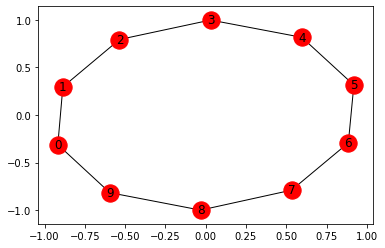

In [42]:
## Visualization adjacency matrix
import networkx as nx
G = nx.cycle_graph(10)
A = nx.adjacency_matrix(G)
print(A.todense())
nx.draw_networkx(G)

In [2]:
import matplotlib.pyplot as plt
nx.draw_networkx(G)
plt.show()

C:\Users\gladies\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\gladies\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


<Figure size 640x480 with 1 Axes>

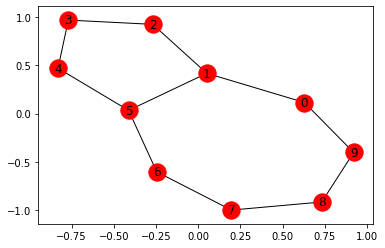

In [3]:
G.add_edge(1,5)
nx.draw_networkx(G)
plt.show()

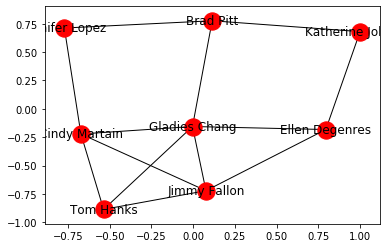

In [4]:
## Visualization adjacency list -this is "my network"
import networkx as nx
G_symmetric = nx.Graph()
G_symmetric.add_edge('Cindy Martain','Jennifer Lopez')
G_symmetric.add_edge('Cindy Martain','Jimmy Fallon')
G_symmetric.add_edge('Cindy Martain','Tom Hanks')
G_symmetric.add_edge('Cindy Martain','Gladies Chang')
G_symmetric.add_edge('Ellen Degenres','Katherine Johnson')
G_symmetric.add_edge('Ellen Degenres','Katherine Johnson')
G_symmetric.add_edge('Brad Pitt','Katherine Johnson')
G_symmetric.add_edge('Katherine Johnson','Brad Pitt')
G_symmetric.add_edge('Ellen Degenres','Jimmy Fallon')
G_symmetric.add_edge('Jimmy Fallon','Gladies Chang')
G_symmetric.add_edge('Brad Pitt','Gladies Chang')
G_symmetric.add_edge('Brad Pitt','Jennifer Lopez')
G_symmetric.add_edge('Jimmy Fallon','Tom Hanks')
G_symmetric.add_edge('Tom Hanks','Gladies Chang')
G_symmetric.add_edge('Ellen Degenres','Gladies Chang')
nx.draw_networkx(G_symmetric)

In [10]:
## I check facebook dataset from website  - this is facebook network - 
## I refer to datacamp site to compare with "my network"
import networkx as nx
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

In [11]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


(-0.9657380995161217,
 1.0946510252363366,
 -0.8358074340622605,
 0.8237482241812333)

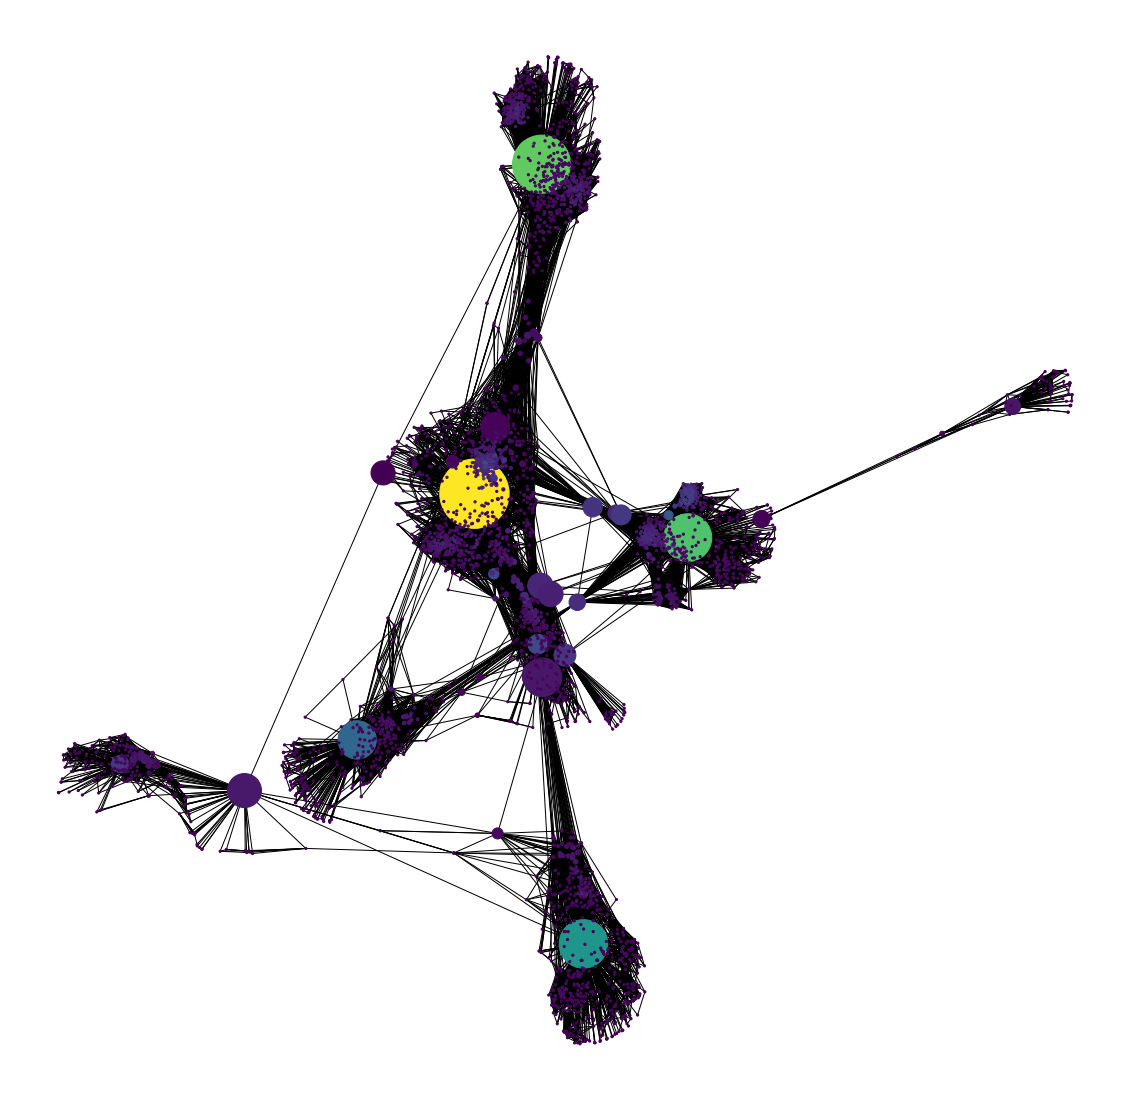

In [12]:
from matplotlib import pyplot as plt
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

## 4. Python implementation to of depth-first-search (DFS) on graphs

######  (5 points) Read an adjacency list/matrix representation of graph and convert it into a DiGraph object in networkx. You can ﬁnd more network data here. 

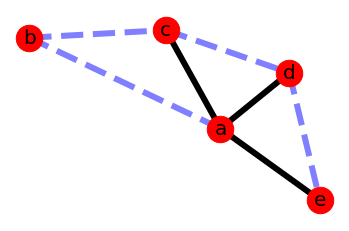

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph()
G.add_edge("a", "b", weight = 1)
G.add_edge("a", "c", weight = 6)
G.add_edge("a", "d", weight = 7)
G.add_edge("b", "c", weight = 2)
G.add_edge("c", "d", weight = 3)
G.add_edge("d", "e", weight = 4)
G.add_edge("e", "a", weight = 5)
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 4]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 4]
# labels
pos = nx.spring_layout(G)  # positions for all nodes
# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
plt.axis('off')
plt.show()

[[0 1 0 ... 0 0 1]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [1 0 0 ... 0 1 0]]


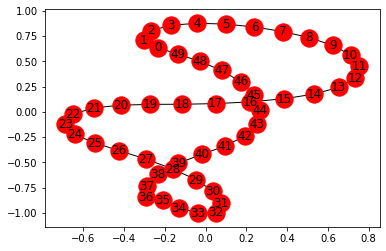

In [45]:
## Visualization adjacency matrix
import networkx as nx
G = nx.cycle_graph(50)
A = nx.adjacency_matrix(G)
print(A.todense())
nx.draw_networkx(G)

###### (70 points) Implement DFS and perform it on G from an arbitrary node s and allow users to make queries on the reachability from s to anywhere in G. You can return two list/arrays from your DFS(G,s) calls: visited: is a list with n (number of nodes) elements (Boolean type). EdgeTo: a list with n elements that shows the previous n Hint: Use of Stack is recommended.

In [81]:
graph = {
    '1' : ['2','9'],
    '2' : ['1'],
    '3' : ['4','5','6','9'],
    '4' : ['3'],
    '5' : ['3','8'],
    '6' : ['3','7'],
    '7' : ['6','9'],
    '8' : ['5','7'],
    '9' : ['1','3','7']
}
 
def dfs(graph, vertex): 
    visited = [vertex] 
    stack = [vertex]
    while stack:
        vertex = stack[-1] 
        if vertex not in visited:
            visited.append(vertex)
        pop_stack = True
        for next in graph[vertex]:
            if next not in visited:
                stack.extend(next)
                pop_stack = False
                break
        if pop_stack:
            stack.pop()
    return visited

print (dfs(graph, '1'))    

['1', '2', '9', '3', '4', '5', '8', '7', '6']


###### (15) Build a DFS tree using EdgeTo and visualize it in the graph (different edge width and color). See this as a reference for drawing graphs.

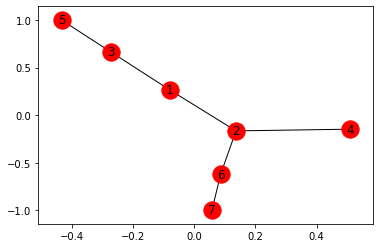

In [55]:
import networkx as nx            
import matplotlib.pyplot as plt  
import numpy as np  
import seaborn as sns  
gf=nx.Graph()

gf.add_node(1)
gf.add_node(2)
gf.add_node(3)
gf.add_node(4)
gf.add_node(5)
gf.add_node(6)
gf.add_node(7)
gf.add_edge(1,2)
gf.add_edge(1,3)
gf.add_edge(2,6)
gf.add_edge(2,4)
gf.add_edge(3,5)
gf.add_edge(6,7)
nx.draw_networkx(gf)
plt.show()

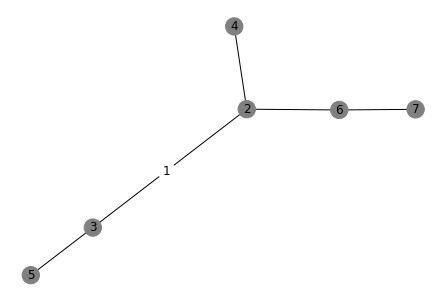

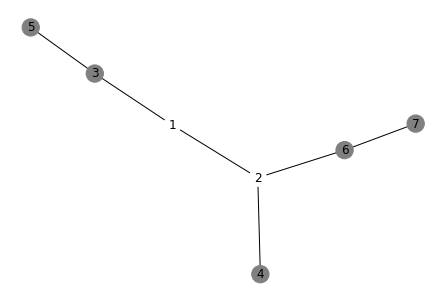

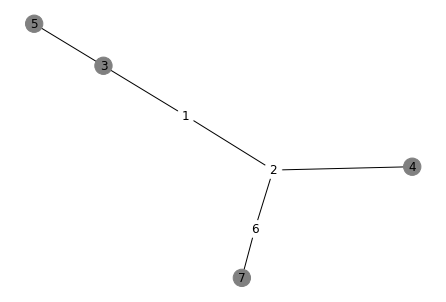

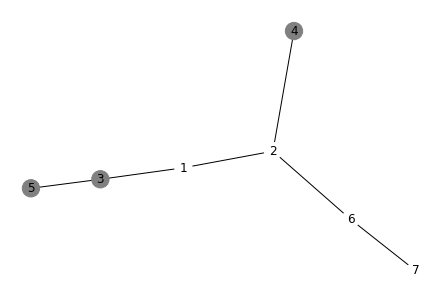

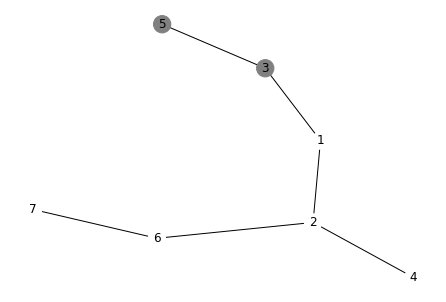

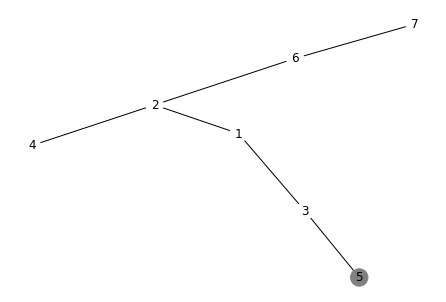

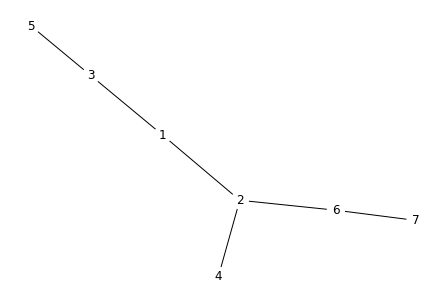

In [82]:
visited=[]
color_map=['gray']*(gf.number_of_nodes()) #Coloring them yellow.
def dfs(x):
    if(x not in visited):  
        color_map[x-1]='white'  
        nx.draw(gf,node_color=color_map,with_labels=True)
        plt.show()
        visited.append(x)
        all_n=nx.neighbors(gf,x)
        for x_tov in all_n:
            dfs(x_tov)
dfs(1)

######  (10) Compare the use of loop or recursion for coding DFS. Which one do you recommend and why

In [85]:
## recursive
graph = {
    '1' : ['2','9'],
    '2' : ['1'],
    '3' : ['4','5','6','9'],
    '4' : ['3'],
    '5' : ['3','8'],
    '6' : ['3','7'],
    '7' : ['6','9'],
    '8' : ['5','7'],
    '9' : ['1','3','7']
}
def dfs(graph, vertex, visited):
    if vertex not in visited:
        visited.append(vertex)
        for n in graph[vertex]:
            dfs(graph,n, visited)
    return visited

visited = dfs(graph,'1', [])
print(visited)

['1', '2', '9', '3', '4', '5', '8', '7', '6']


I would like to recommend recursive one, because the code is more succinct and easy to read.